# Kaggle ECG dataset EDA

Author: Ben Sturm (bwsturm@gmail.com)

Here I'm exploring the ECG Heartbeat Categorization dataset found [here](https://www.kaggle.com/shayanfazeli/heartbeat).  The data consists of an Arrhythmia dataset and a myocardial infarction dataset.  We will explore both.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

First let's load in the MIT-BIH Arrhythmia dataset.

In [3]:
df_train = pd.read_csv('mitbih_train.csv')
df_test = pd.read_csv('mitbih_test.csv')

In [4]:
print("Shape of training dataset: {}".format(df_train.shape))
print("Shape of test dataset: {}".format(df_test.shape))

Shape of training dataset: (87553, 188)
Shape of test dataset: (21891, 188)


In [5]:
df_train.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Clearly the columns are not labeled correctly.  Let's reindex the column names to something that makes more sense.

In [6]:
column_names = ['ts{}'.format(i) for i in range(188)]

In [7]:
df_train = pd.read_csv('mitbih_train.csv',names = column_names)
df_test = pd.read_csv('mitbih_test.csv',names = column_names)

In [9]:
print("Shape of training dataset: {}".format(df_train.shape))
print("Shape of test dataset: {}".format(df_test.shape))

Shape of training dataset: (87554, 188)
Shape of test dataset: (21892, 188)


In [10]:
df_train.head()

,ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,...,ts178,ts179,ts180,ts181,ts182,ts183,ts184,ts185,ts186,ts187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The last column of the dataframe should correspond to the class label
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

Let's save that to y_train and y_test.

In [29]:
y_train = df_train['ts187']
df_train.drop(columns=['ts187'], inplace=True)
y_test = df_test['ts187']
df_test.drop(columns=['ts187'], inplace=True)

In [30]:
print("Shape of training dataset: {}".format(df_train.shape))
print("Shape of test dataset: {}".format(df_test.shape))

Shape of training dataset: (87554, 187)
Shape of test dataset: (21892, 187)


What is the distribution of class labels for y_train and y_test?

In [31]:
y_train.value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: ts187, dtype: int64

Text(0, 0.5, 'Count')

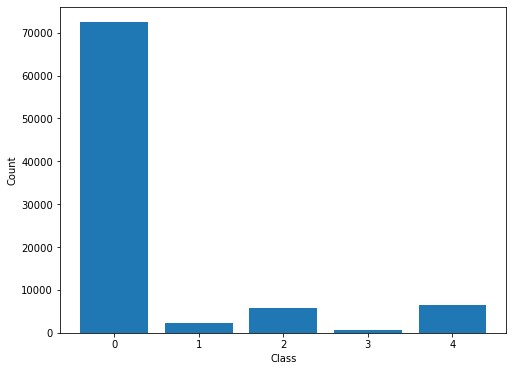

In [40]:
fig, ax = plt.subplots(1,1, figsize=[8,6])
ax.bar(y_train.value_counts().index, y_train.value_counts().values)
ax.set_xlabel('Class')
ax.set_ylabel('Count')

In [33]:
y_test.value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: ts187, dtype: int64

Text(0, 0.5, 'Count')

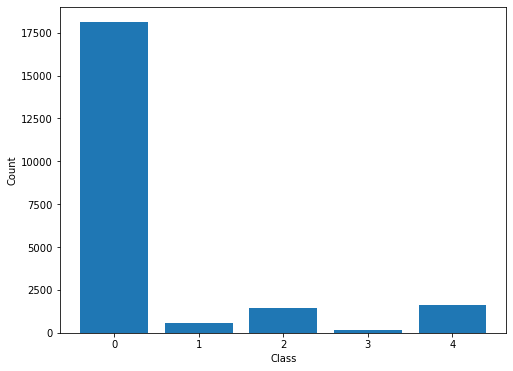

In [41]:
fig, ax = plt.subplots(1,1, figsize=[8,6])
ax.bar(y_test.value_counts().index, y_test.value_counts().values)
ax.set_xlabel('Class')
ax.set_ylabel('Count')

In [45]:
print("The fraction of Class 0 instances in the training set is {:.3f}".format(y_train.value_counts()[0]/y_train.value_counts().sum()))
print("The fraction of Class 0 instances in the test set is {:.3f}".format(y_test.value_counts()[0]/y_test.value_counts().sum()))

The fraction of Class 0 instances in the training set is 0.828
The fraction of Class 0 instances in the test set is 0.828


Clearly, we have a situation in which we have an imbalanced data set with 82.8% of the data belonging to Class 0.

In [34]:
def plot_rows(df, row_indices=[0]):
    fig, ax = plt.subplots(1,1, figsize=[10,8])
    xdat = [i*(1/125)*1000 for i in range(187)]
    for idx in row_indices:
        ax.plot(xdat,df.iloc[idx,:])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Normalized Value')
        

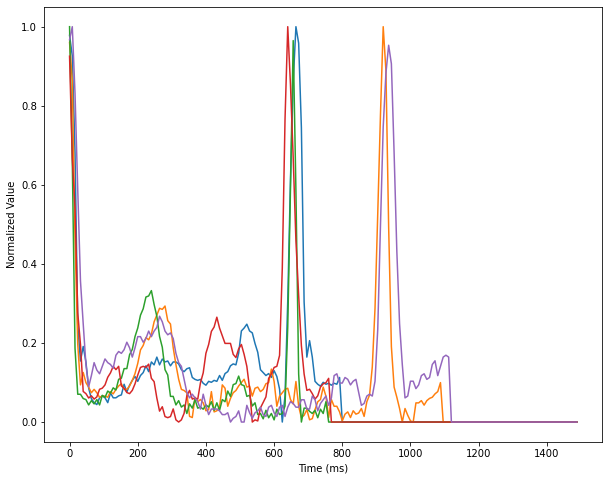

In [35]:
plot_rows(df_train,[0,1,2,3,4])

In [42]:
y_train.loc[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: ts187, dtype: float64

All of the ECG traces in the plot above belongs to Class 0.  Let's create a new plot that displays traces from each of the target label classes.

In [111]:
np.random.seed(1)

def plot_traces_each_class(X, y, num_traces=1):
    """
    Plots random set of ECG traces for each target label
    
    Parameters
    ----------
    X: Pandas dataframe with the time series ECG data
    y: Pandas series with the target labels
    num_traces: int value corresponding to the number of traces to plot in each subfigure
    
    """
    labels = y.unique()
    fig, ax = plt.subplots(1,len(labels), figsize=[20,5])
    xdat = [i*(1/125)*1000 for i in range(187)] # corresponds to the sampling times in ms
    for i in range(len(labels)):
        mask = y == i # creates a boolean mask corresponding to a certain target label class
        index_list = y.index[mask].tolist() # selects indices where mask == True and converts to list
        np.random.shuffle(index_list) # shuffles index_list such that each call to function returns a different shuffled list
        for j in range(num_traces): # loop to call plot function for each trace from 0 to num_traces
            ax[i].plot(xdat, X.iloc[index_list[j],:])
        ax[i].set_xlabel('Class {}'.format(i))

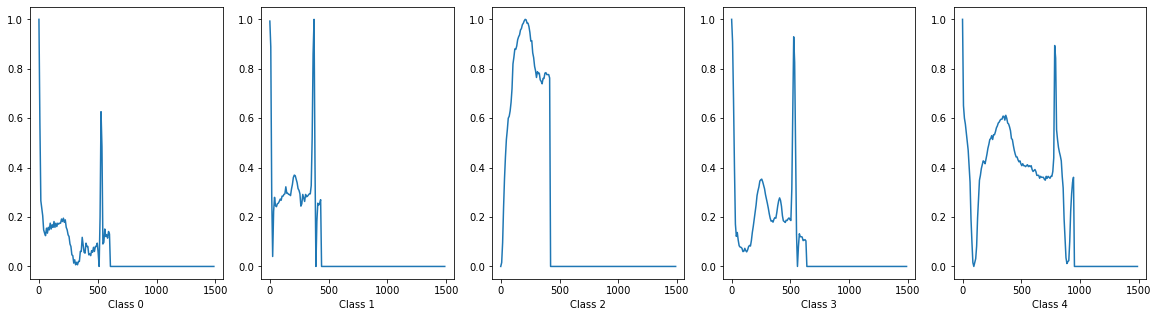

In [115]:
plot_traces_each_class(df_train, y_train, 1)

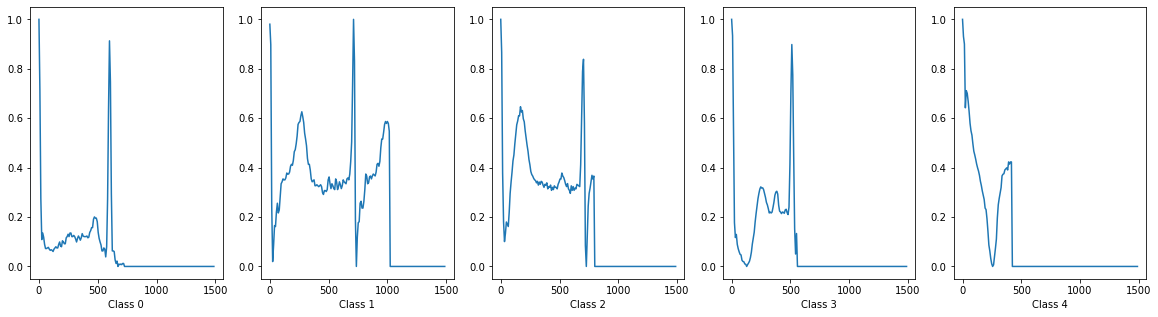

In [116]:
plot_traces_each_class(df_train, y_train, 1)

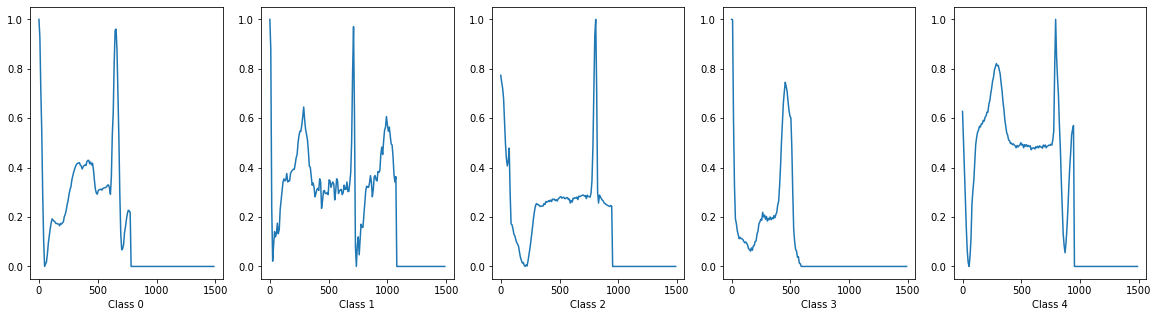

In [117]:
plot_traces_each_class(df_train, y_train, 1)

The ECG traces in the plots above appear very interesting.  It's very difficult to see a pattern by eye.  Some of these traces don't even appear to be valid ECG traces.  Since this data has been pre-processed, it's possible that the pre-processing step didn't always select the appropriate window. 